In [1]:
%matplotlib inline
# not sure if necessary

In [2]:
import finetune
import importlib
import torch

In [21]:
# run this cell when you change stuff in the finetune module, and don't want to restart the notebook's kernel.
importlib.reload(finetune)
finetune.structure_checkpoints() # If this prints 'Cannot safely create ...', it means that the folder probably already exists

cannot safely create ../../data\finetuned_models
cannot safely create ../../data\finetuned_models\StanfordCars
cannot safely create ../../data\finetuned_models\StanfordCars\resnet
cannot safely create ../../data\finetuned_models\StanfordCars\alexnet
cannot safely create ../../data\finetuned_models\StanfordCars\vgg
cannot safely create ../../data\finetuned_models\StanfordCars\squeezenet
cannot safely create ../../data\finetuned_models\StanfordCars\densenet
cannot safely create ../../data\finetuned_models\StanfordCars\inception
cannot safely create ../../data\finetuned_models\FGVC-Aircraft
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\resnet
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\alexnet
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\vgg
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\squeezenet
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\densenet
cannot safely create ../../data\finetuned_models\FG

In [ ]:
# models = ['resnet', 'alexnet', 'densenet', 'squeezenet', 'vgg']
#
# for name in models:
#     print('[TRAINING]:', name)
# finetune.CLASSIFIER_NAME = name
importlib.reload(finetune)


finetune.CLASSIFIER_NAME = 'resnet'
finetune.NUM_EPOCHS = 30
finetune.FEATURE_EXTRACT = False
finetune.DATASET = 'FGVC-Aircraft' # [StanfordCars, FGVC-Aircraft]
finetune.print_hypers() # shows params
occlusion = '0'

# Initialize the model for this run
model_ft = finetune.initialize_model(_verbose=False)


model, hist, state = finetune.finetune_model(model_ft, 'adam', checkpoint_save=10, occlusion=occlusion)


In [82]:
model_save_path = finetune.format_model_path(finetune.CLASSIFIER_NAME,
                                             finetune.DATASET,
                                             state['epochs'],
                                             occlusion=occlusion)

finetune.save_model(state, model_save_path)

[CHECKPOINT] ../../data\finetuned_models\FGVC-Aircraft\resnet\resnet_FGVC-Aircraft_E30_occ0.pth


In [25]:
# # Loading certain model
# model_props = {
#     'name': 'resnet',
#     'dataset': 'StanfordCars',
#     'epochs': 2
# }
# model_load_path = finetune.format_model_path(model_props['name'],
#                                              model_props['dataset'],
#                                              3)
# ,
# state = torch.load(model_load_path)
# new_model = finetune.get_model_architecture(model_props['name'])
# new_model.load_state_dict(state['model_state_dict'])
# optimizer_state_dict = state['optimizer_state_dict']

In [26]:
# importlib.reload(finetune)

In [13]:
model_save_path = finetune.format_model_path(finetune.CLASSIFIER_NAME,
                                             finetune.DATASET,
                                             state['epochs'])

finetune.save_model(state, model_save_path)

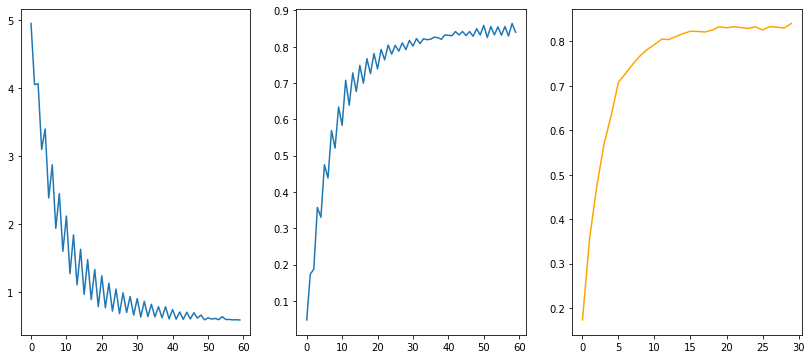

In [26]:
finetune.format_model_path('resnet',
                           'FGVC-Aircraft',
                           30)

checkpoint = finetune.load_checkpoint(model_save_path)

train_acc_history, train_loss_history, val_acc_history = finetune.get_information_from_checkpoint(checkpoint, plot=True)

In [ ]:
optimizer_state_dict = checkpoint['optimizer_state_dict']
finetune.NUM_EPOCHS = 10
checkpoint_model = finetune.get_model_architecture('resnet')
checkpoint_model.load_state_dict(checkpoint['model_state_dict'])

test_model, hist, state = finetune.finetune_model(checkpoint_model,
                                             'adam',
                                             optimizer_state_dict=optimizer_state_dict,
                                             checkpoint_save=5,
                                             is_retrain=True)


In [ ]:
hist

In [17]:
model_save_path = finetune.format_model_path(finetune.CLASSIFIER_NAME,
                                             finetune.DATASET,
                                             state['epochs'])
finetune.save_model(state, model_save_path)

[CHECKPOINT] ../../data\finetuned_models\FGVC-Aircraft\resnet\resnet_FGVC-Aircraft_E30.pth


In [70]:
arr = np.array([
    [True, True, False],
    [True, True, False],
    [False, False, False]
])

x = np.array([
    [0.58, 0.58, 0.58],
    [0.58, 0.58, 0.58],
    [0.58, 0.58, 0.58]
])

print(x*arr)

[[0.58 0.58 0.  ]
 [0.58 0.58 0.  ]
 [0.   0.   0.  ]]
